In [68]:
# Avataan peruskirjastot

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

%matplotlib inline

In [69]:
# Lataan tiedot dataframeen ja katson sen headin

df1=pd.read_excel('http://taanila.fi/Concrete_Data.xlsx')
df1.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [70]:
# Sarakkeet ovat vähän monimutkaisesti nimetty. Yksikkönä suurimmassa osassa on kiloa per kuutio, ikä on päivinä ja
# kestävyys megapascaleina.

df1.columns = ['Cement', 'Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse', 'Fine', 'Age_Days', 'Str_MPa']

In [71]:
df1.head()

,Cement,Slag,Fly Ash,Water,Superplasticizer,Coarse,Fine,Age_Days,Str_MPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [72]:
# Tarkistan nuo datatyypit vielä varmuudeksi

df1.dtypes

Cement              float64
Slag                float64
Fly Ash             float64
Water               float64
Superplasticizer    float64
Coarse              float64
Fine                float64
Age_Days              int64
Str_MPa             float64
dtype: object

In [106]:
# Tässä ihan vaan describe, jotta saan tolkkua datasta

df1.describe()

,Cement,Slag,Fly Ash,Water,Superplasticizer,Coarse,Fine,Age_Days,Str_MPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [109]:
# Tarkistan onko tyhjiä arvoja

df1.isnull().sum()

Cement              0
Slag                0
Fly Ash             0
Water               0
Superplasticizer    0
Coarse              0
Fine                0
Age_Days            0
Str_MPa             0
dtype: int64

In [75]:
df1.head()

,Cement,Slag,Fly Ash,Water,Superplasticizer,Coarse,Fine,Age_Days,Str_MPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


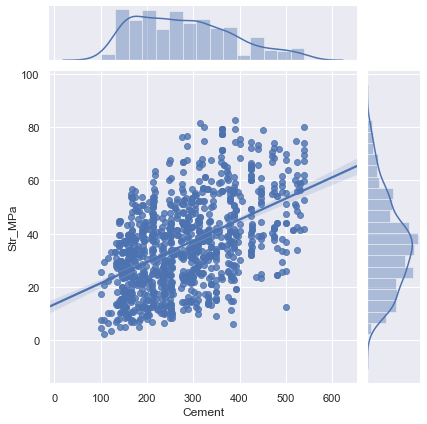

In [76]:
# Videon ohjeiden mukaan jointplotteja muutamalla selittävällä tekijällä. Tässä sementin määrä seoksessa. Arvattavasti
# vaikuttaa betonin kestävyyteen nousevasti.

sns.jointplot(data=df1, x='Cement', y='Str_MPa', kind='reg')

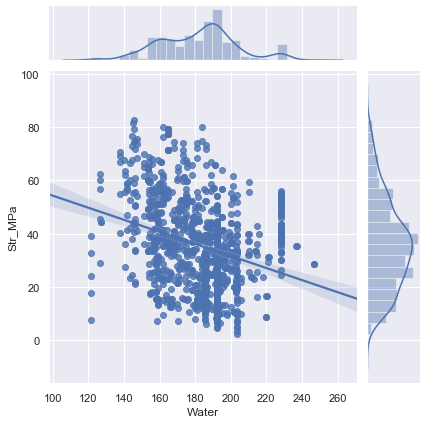

In [77]:
# Veden määrä seoksessa.

sns.jointplot(data=df1, x='Water', y='Str_MPa', kind='reg')

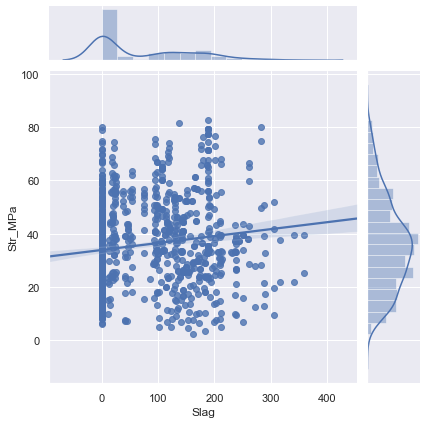

In [78]:
sns.jointplot(data=df1, x='Slag', y='Str_MPa', kind='reg')

In [90]:
# Määritetään selittävä ja selitettävä

X = df1['Cement'].to_frame()
y = df1['Str_MPa']

In [91]:
# Sovitus malliin

model = LinearRegression().fit(X, y)

In [92]:
model.coef_

array([0.07957957])

In [93]:
model.intercept_

13.44279487282527

In [96]:
model.score(X, y)*100

24.783741936758183

In [99]:
# Betonin vahvuuden ennustus kiloja kuutiossa määrin.

model.predict(pd.DataFrame([100, 200, 300, 400, 500, 1000]))

array([21.40075221, 29.35870954, 37.31666687, 45.2746242 , 53.23258153,
       93.0223682 ])

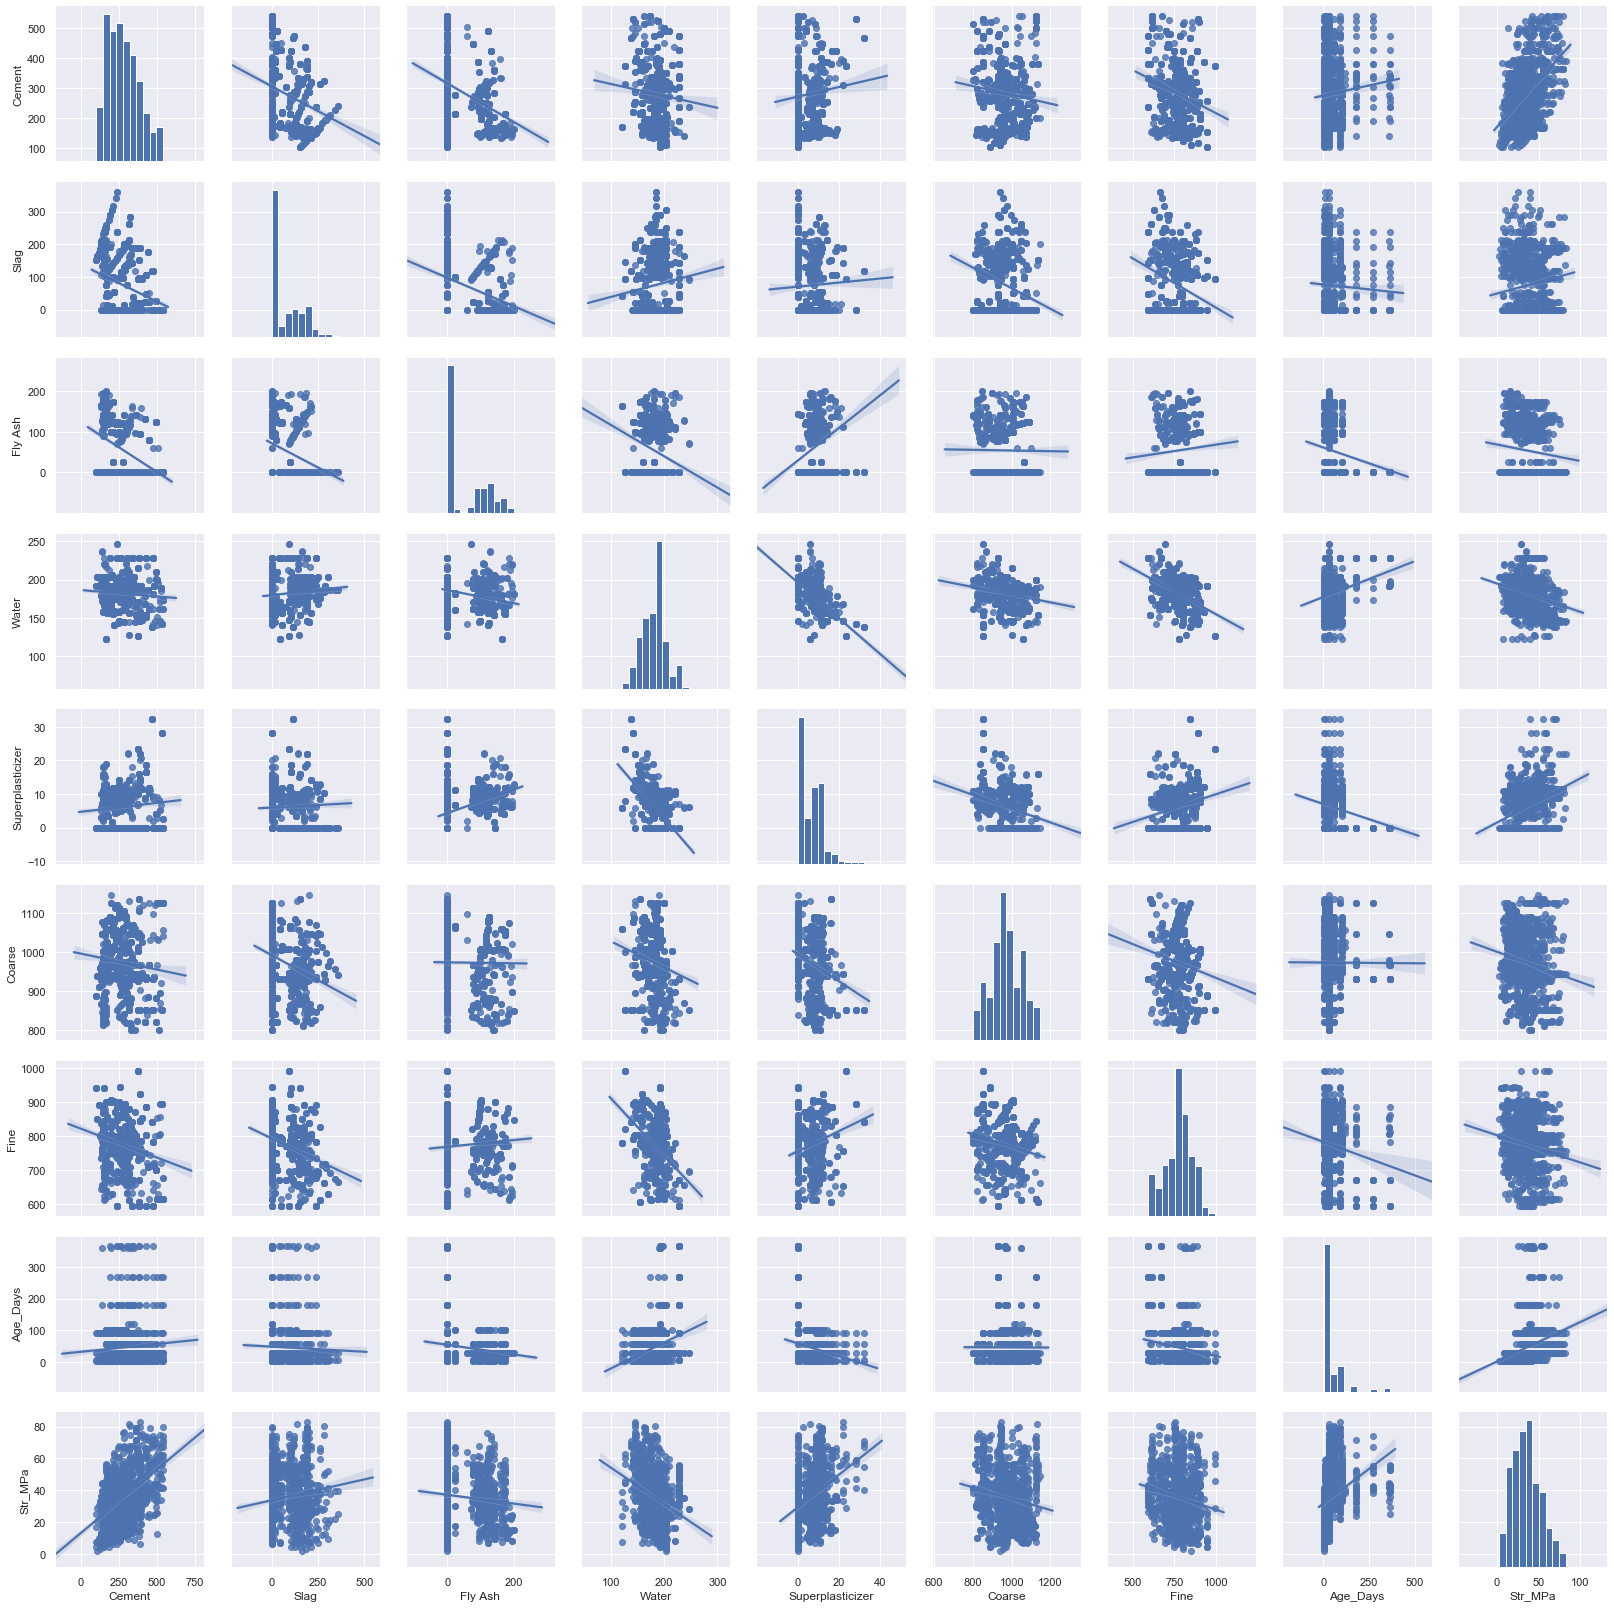

In [110]:
# Teen pairplotin jossa meni aika kauan laskeskellessa. Viimeinen rivi näyttää havainnollisesti eri ainesosien vaikutuksen
# betonin vahvuuteen


sns.pairplot(df1, kind='reg')

(9.0, 0.0)

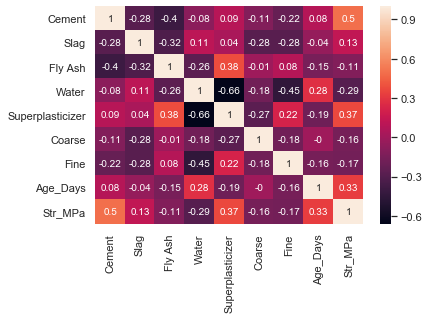

In [105]:
# Korrelaatiokertoimet ja heatmap. Kuten aikaisemmassa tehtävässä, jouduin pienellä kiertotiellä asettamaan
# heatmapin näkyviin.

correlation_matrix = df1.corr().round(2)
ax = sns.heatmap(data=correlation_matrix, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [131]:
# Määritelläään muuttujat

X = df1[['Cement', 'Slag', 'Fly Ash', 'Water', 'Superplasticizer']]
y = df1['Str_MPa']

In [132]:
model2 = LinearRegression().fit(X, y)

In [133]:
model2.coef_

array([ 0.10672832,  0.07703432,  0.05440007, -0.12036608,  0.29953257])

In [134]:
model2.intercept_

17.16562531124586

In [135]:
model2.score(X, y)

0.4477634789127233

Text(0, 0.5, 'Ennustevirhe')

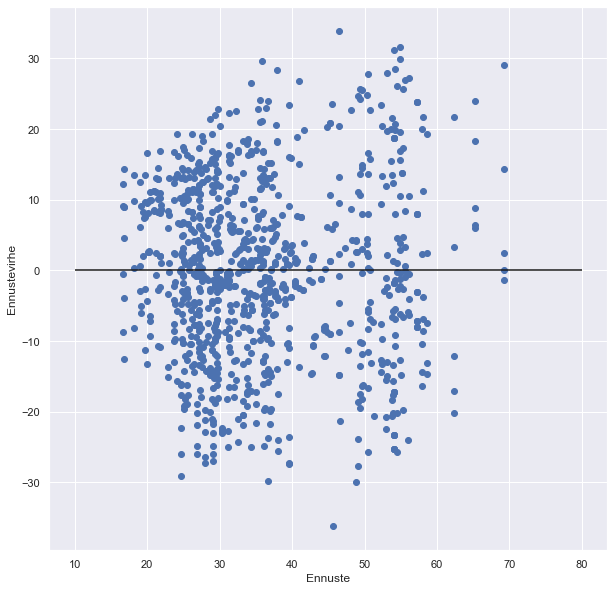

In [142]:
# Tässä scatteri jossa ennustevirheet

plt.rcParams["figure.figsize"] = (10,10)
plt.scatter(model2.predict(X), model2.predict(X)-y)
plt.hlines(y=0, xmin=10, xmax=80)
plt.xlabel('Ennuste')
plt.ylabel('Ennustevirhe')

Text(0, 0.5, 'Ennuste')

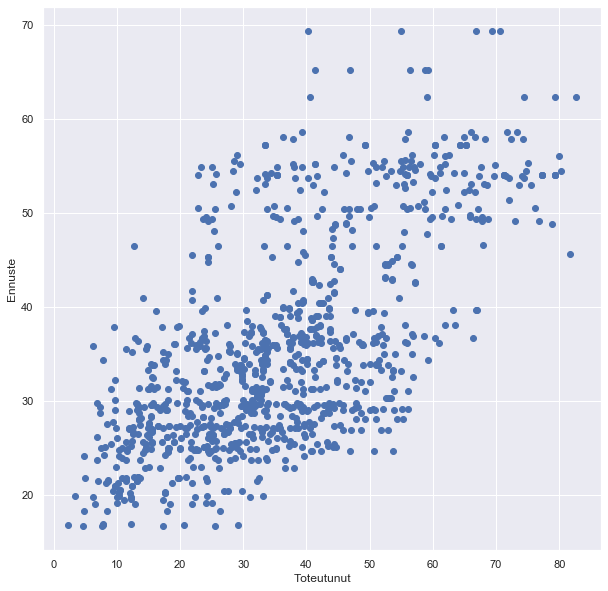

In [146]:
plt.scatter(y, model2.predict(X))
plt.xlabel('Toteutunut')
plt.ylabel('Ennuste')

In [ ]:
# Tällä kertaa lopetan tähän, seuraan kuitenkin tuon vaativamman esimerkin videonkin.